Ideas for how to implement simple two-layer climate model with interactive components
========

Useful info:
* https://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html
* Forcing files/SSP data: IPCC AR6 WGI Annex III https://www.ipcc.ch/report/ar6/wg1/. Has link to data:
  * https://zenodo.org/record/5705391#.YvtbUmHMIW0

Notes:
* All input data currently comes from Excel model, after being exported and cleaned up.

TODO: 
* Fit model against obs using minimization.
* Get updated AR6 forcing data.
* Get SSP scenario data for future.
* Simple instructions on how to get working.
* Why is uncertainty lacking one year (runs 1850-2015).
* Make sure UI works on different screen sizes.
* Clean up unused files.

DONE: 
* **Check/compare model output with Excel.** Was using lambda=0.08 instead of 0.8.
* **Get obs data as CSV and compare against obs.** Done, plus uncertainty.
* **Check it works using AppsAnywhere on windows.** Works for me with no extra setup.
* **Dropdown for SSP scenario.** UI element there but doesn't work yet.
* **Better control layout - nice to get some sort of grid.** Layout good enough for time being.
* **Buttons to turn e.g. all anthro on/off, reset vars to defaults.** Done. Was a bit tricky getting it all working together.
* **Rationalize all input data CSV files.** Done. Originals were exported from Excel. Cleaned up and renamed some columns.
* **User-defined forcing.** Done - add as argument to `run_model`.
* **Display forcing as well.** Done.
* **RMSE vs obs. (Values seem different to Excel).** Done. Checked and these values match now after fixing a small off-by-one error.

Updates:
* 29/7/22: Initial playing. Import forcing data (exported from Excel as CSV). Implement simple model which is a copy of the Excel CLIMATE MODEL tab. Get interactive controls working with checkboxes and sliders.
* 29/7/22: Try on AppsAnywhere. Fix problem with lambda value. Get obs data.
* 29/7/22: Nicer layout of controls.
* 4/8/22: Fix buttons to e.g. set all anthro forcings on/off. Split into model/UI. Make mode usable on its own.
* 5/8/22: Simplify/clean input files. User-defined forcing and display forcing.

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import climate_model
import importlib
importlib.reload(climate_model)
model = climate_model.ClimateModel()
ui = climate_model.ClimateModelUI(model)
ui.display()

Output()

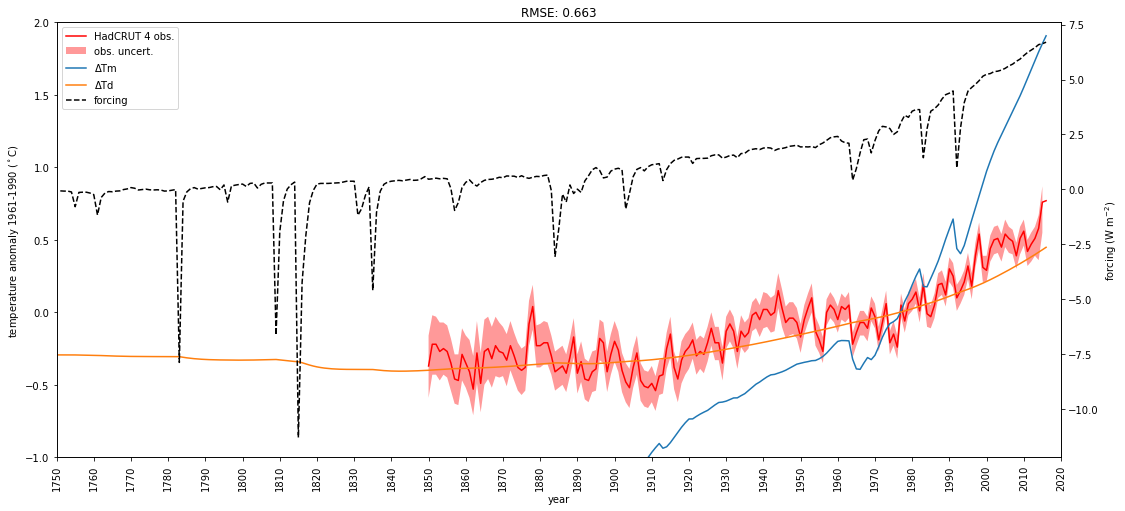

In [25]:
method = '3xCO2'

if method == 'step':
    # Turn on forcing at 1850:
    total_forcing = np.zeros_like(model.forcings.year.loc[1:])
    total_forcing[100:] = 1
elif method == 'pulse':
    # Forcing pulse 1850-1859:
    total_forcing = np.zeros_like(model.forcings.year.loc[1:])
    total_forcing[100:110] = 3
elif method == '3xCO2':
    # 3x CO2 forcing:
    columns = [c for c in model.forcings.columns if c != 'year']
    forcings = model.forcings.copy()
    forcings['CO2'] *= 3
    total_forcing = forcings.loc[1:][columns].sum(axis=1)
else:
    raise Exception(f'Unknown method: {method}')

model.run_model(total_forcing=total_forcing)
model.plot()

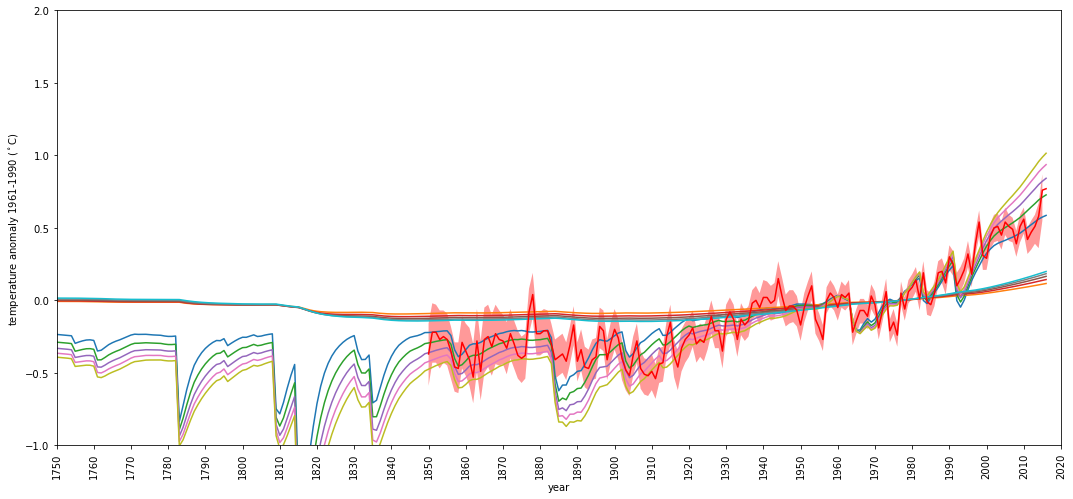

In [26]:
fig, ax = plt.subplots()
fig.set_size_inches((18, 8))
for lam in np.linspace(0.4, 1, 5):
    model.run_model(lam=lam)
    model.plot(ax=ax, show_forcing=False)
model.base_plot(ax=ax)

In [27]:
model.forcings

,year,CO2,Other well mixed GHGs,Trop. O3,Strat. O3,Direct Sulphate Aerosol,Aerosol-Cloud Interactions,Biomass Burning Aerosol,Black & Organic Carbon Aerosol,Solar,Volcanic aerosols in Strat.
0,1750,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,1751,-0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.01,0.00
2,1752,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,0.00
3,1753,-0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.03,0.00
4,1754,-0.03,0.01,0.00,0.00,0.00,0.00,0.00,0.00,-0.04,0.00
...,...,...,...,...,...,...,...,...,...,...,...
262,2012,1.85,1.02,0.39,-0.04,-0.39,-0.44,0.01,0.26,0.05,-0.07
263,2013,1.88,1.03,0.39,-0.04,-0.38,-0.44,0.03,0.20,0.06,-0.04
264,2014,1.91,1.03,0.38,-0.03,-0.37,-0.43,0.05,0.15,0.08,0.00
265,2015,1.94,1.03,0.38,-0.03,-0.37,-0.43,0.05,0.15,0.03,0.00
